In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 55s 36ms/step - loss: 1.2214 - accuracy: 0.8481 - val_loss: 0.3535 - val_accuracy: 0.8772
Epoch 2/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2779 - accuracy: 0.8991 - val_loss: 0.3353 - val_accuracy: 0.8831
Epoch 3/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2436 - accuracy: 0.9103 - val_loss: 0.3165 - val_accuracy: 0.8899
Epoch 4/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2200 - accuracy: 0.9186 - val_loss: 0.3456 - val_accuracy: 0.8865
Epoch 5/10
1500/1500 [==============================] - 53s 36ms/step - loss: 0.1997 - accuracy: 0.9265 - val_loss: 0.3195 - val_accuracy: 0.8944
Epoch 6/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.1772 - accuracy: 0.9326 - val_loss: 0.3781 - val_accuracy: 0.8824
Epoch 7/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.1628 - accuracy: 0.9396 - val_loss: 0.3587 -

In [11]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.5078 - accuracy: 0.8901


In [5]:
# Get help on a specific function
help(keras.datasets.fashion_mnist.load_data) #As we can not mugg up the labels this is the cheat to find them but works only if internet is connected.

Help on function load_data in module keras.src.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.
    
    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(60000,

In [32]:
# Labels for Fashion MNIST classes
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

1/1 [==============================] - 0s 21ms/step


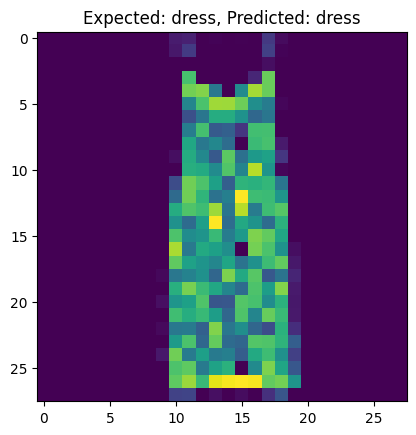

In [43]:
# Make predictions on a sample from the test data
predictions = model.predict(test_x[300:301])
predicted_label = labels[np.argmax(predictions)]
expected_label = labels[test_y[300]]

# Visualize the image
plt.imshow(test_x[300:301][0])
plt.title(f'Expected: {expected_label}, Predicted: {predicted_label}')
plt.show()